In [73]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [155]:
# Read in files from the current working directory.
regression = pd.read_excel('Regression.xlsx')
regression2 = pd.read_excel('Regression2.xlsx')
Total = pd.read_excel('Total.xlsx')

In [75]:
regression.head()

,Year,Month,UniquePeople,Male,Female,1 to 3,4 to 7,8 to 10,1 to 15,16-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,16+
0,2019,Apr,3008313,1619505,1388807,793630,1200002,1014681,1031397,278942,421977,403524,349697,257406,198122,60501,6747,1976916
1,2019,May,2980714,1612396,1368318,772105,1198422,1010187,1026587,264336,417020,401166,348437,258115,197421,60741,6889,1954125
2,2019,Jun,3069902,1644865,1425036,806556,1229570,1033776,1040531,287582,428455,414493,359130,265317,203332,63903,7160,2029372
3,2019,Jul,3143102,1683158,1459944,852644,1249959,1040498,1099738,294455,432242,416486,354106,267578,206724,64636,7137,2043364
4,2019,Aug,3145852,1679134,1466719,853085,1248698,1044069,1153922,278809,426541,404292,342825,265643,203251,63552,7018,1991931


In [76]:
# Define the dependent variable.
y = regression['UniquePeople']  

# Define the independent variable.
#X = regression[['1 to 15', '16-24', '25-34', '35-']]
X = regression[['1 to 15', '16+']]

In [77]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [78]:
# Call the predictions for X (array).
mlr.predict(X)

array([3008313.18259178, 2980712.16857603, 3069903.21621499,
       3143102.18518983, 3145853.10774161, 2971487.13319211,
       3057012.10534014, 2870337.03405934, 2406445.85870418,
       3133006.19153296, 3227941.15280748, 2275265.8843914 ,
       1107033.61669883, 1642209.81144643, 1754562.84087288,
       1937281.89345456, 2147443.94692667, 2083270.91315438,
       2163864.93889953, 2090555.87975198, 1715449.71774299,
       2174446.96964981, 2411859.08964881, 2423288.89901295,
       2230442.94364689, 2270861.97452159, 2267343.96242291,
       2367869.98899558, 2543482.97697937, 2251083.92011198,
       2343175.93961128, 2232574.90128989, 1862159.71797695,
       2345346.97898682, 2388813.00307275, 2461770.00320438,
       2826078.99561078, 3161318.98028856, 2228733.97567859])

In [79]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.9999999999957103
Intercept:  -0.6004781220108271
Coefficients:


[('1 to 15', 0.9999992955205501), ('16+', 1.0000007636479729)]

In [80]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [81]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:           UniquePeople   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.681e+12
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          1.33e-160
Time:                        09:31:12   Log-Likelihood:                -43.000
No. Observations:                  31   AIC:                             92.00
Df Residuals:                      28   BIC:                             96.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8429      0.922     -0.915      0.3

In [82]:
# printing the accuracy score
print(mlr.score(X_train, Y_train))

0.999999999996139


In [83]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  


LinearRegression()

In [84]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [2345346.95988829 2826079.20078998 3145853.28548927 1642209.71458612
 2343175.98817438 2267343.93116401 3057012.24046848 2367869.96427627]


In [85]:
# printing the accuracy score
print(mlr.score(X_test, Y_test))

0.9999999999930582


In [86]:
# Check multicollinearity.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor features
0        25.3    const
1         7.4  1 to 15
2         7.4      16+


In [87]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [88]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 0.5411363785914075, 'LM Test p-value': 0.7629458734806415, 'F-stat': 0.24872593391681272, 'F-test p-value': 0.7814982961252946}


In [89]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 0.9580088075308595
Mean Square Error (Final): 1.4661163798993941


In [90]:
# Running the model with the full sample dataset

# Fit the model with the added constant.
model = sm.OLS(y, sm.add_constant(X)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:           UniquePeople   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.196e+12
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          2.42e-205
Time:                        09:31:12   Log-Likelihood:                -55.963
No. Observations:                  39   AIC:                             117.9
Df Residuals:                      36   BIC:                             122.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6005      0.858     -0.700      0.4

## Second regression predicting throughput from activities

In [139]:
regression2.head()

,Year,Month,TotalThroughput,Fitness (Gym) activities,Group Workout,Swimming - lessons,Swimming activities,Sports Hall activities,Outdoor activities,Other
0,2019,Apr,12799130,3501118,1376630,1945830,2463579,550293,278342,2683338
1,2019,May,12914245,3532233,1355163,2094069,2386767,532010,268164,2745839
2,2019,Jun,12950299,3370708,1276326,2048298,2196094,526491,250870,3281512
3,2019,Jul,13546090,3633663,1351251,2102386,2783498,542687,289981,2842624
4,2019,Aug,13065063,3275685,1153948,1957080,3085344,462016,267405,2863585


In [140]:
# Define the dependent variable.
y = regression2['TotalThroughput']  

# Define the independent variable.
#X = regression[['1 to 15', '16-24', '25-34', '35-']]
X = regression2[['Fitness (Gym) activities', 'Group Workout', 'Swimming - lessons', 'Swimming activities'\
               ]]

In [141]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [142]:
# Call the predictions for X (array).
mlr.predict(X)

array([12940322.94509595, 13041921.39448692, 12403539.1059168 ,
       13415691.0481192 , 12367578.53120417, 12394973.42345864,
       13118421.01197088, 12318820.16390732,  9273107.72991261,
       13503123.86839854, 13237928.10274652,  8273256.214404  ,
        4091865.20489929,  8322184.81825861,  9583195.77593003,
        9763893.70684494,  9771849.6109332 ,  9902504.12622589,
       10069550.70059857, 10125657.67371527,  7441722.11179478,
       11065681.54431746, 10961814.47770533, 11955991.24720685,
       10535016.68638351, 11557598.40107587, 11130635.48434951,
       11063487.06763564, 11434756.21032824, 10531362.54686689,
       10893041.0016316 , 10741326.10299961,  7676379.59581491,
       11294423.06434759, 10731979.3419829 , 11572614.69262896,
       10585987.40507233, 11348905.49017836, 11190869.37065225])

In [143]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.9813295293002129
Intercept:  171413.73028409295
Coefficients:


[('Fitness (Gym) activities', 0.9657428027672545),
 ('Group Workout', 3.624313161630724),
 ('Swimming - lessons', 1.3713689468758299),
 ('Swimming activities', 0.7022062775652319)]

In [144]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [145]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:        TotalThroughput   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     440.8
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.78e-23
Time:                        09:50:57   Log-Likelihood:                -427.75
No. Observations:                  31   AIC:                             865.5
Df Residuals:                      26   BIC:                             872.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [146]:
# printing the accuracy score
print(mlr.score(X_train, Y_train))

0.9847683813764389


In [147]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [148]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [11285270.7242496  10569481.03467515 12257953.82328835  8231957.60216589
 10872480.64047355 11079055.36498844 13117903.14411903 10951648.76941563]


In [149]:
# printing the accuracy score
print(mlr.score(X_test, Y_test))

0.9412141052116316


In [150]:
# Check multicollinearity.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0        95.4                     const
1         3.2  Fitness (Gym) activities
2         6.9             Group Workout
3         4.3        Swimming - lessons
4         1.5       Swimming activities


In [151]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [152]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 7.0265920391541625, 'LM Test p-value': 0.1344896131941033, 'F-stat': 1.9051462490896771, 'F-test p-value': 0.13964071735916572}


In [153]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 263718.0180563419
Mean Square Error (Final): 117739184383.2571


In [154]:
# Running the model with the full sample dataset

# Fit the model with the added constant.
model = sm.OLS(y, sm.add_constant(X)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:        TotalThroughput   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     446.8
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           7.20e-29
Time:                        09:50:57   Log-Likelihood:                -541.15
No. Observations:                  39   AIC:                             1092.
Df Residuals:                      34   BIC:                             1101.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

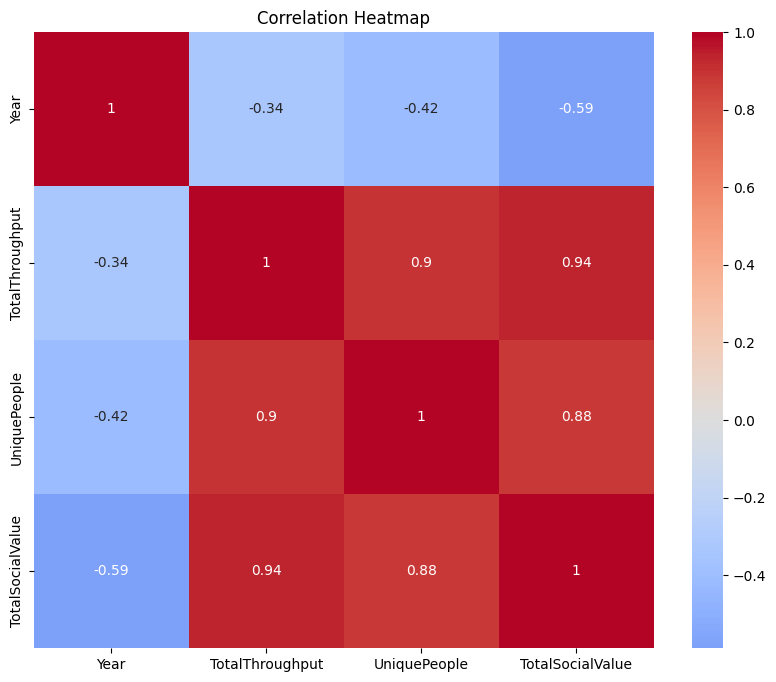

In [167]:
# Calculate correlation matrix
Total_data = Total.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Total_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [164]:
# Independent variable.
x = Total['UniquePeople']

# Dependent variable.
y = Total['TotalThroughput']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = Total).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     155.9
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           7.83e-15
Time:                        09:57:01   Log-Likelihood:                -586.58
No. Observations:                  39   AIC:                             1177.
Df Residuals:                      37   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.443e+06   6.84e+05      3.572      0.001    1.06e+06    3.83e+06
x              3.4456      0.276     12.484      0.000       2.886       4.005
==============================================================================
Omnibus:                       15.302   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.612
Skew:                          -1.430   Prob(JB):                     0.000247
Kurtosis:                       4.429   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 2.443e+06 + 3.4456 * Total['UniquePeople']

# View the output.
y_pred

0     1.280844e+07
1     1.271335e+07
2     1.302065e+07
3     1.327287e+07
4     1.328235e+07
5     1.268155e+07
6     1.297625e+07
7     1.233304e+07
8     1.073465e+07
9     1.323809e+07
10    1.356519e+07
11    1.028265e+07
12    6.257396e+06
13    8.101399e+06
14    8.488522e+06
15    9.118099e+06
16    9.842233e+06
17    9.621119e+06
18    9.898806e+06
19    9.646220e+06
20    8.353755e+06
21    9.935278e+06
22    1.075330e+07
23    1.079268e+07
24    1.012821e+07
25    1.026748e+07
26    1.025536e+07
27    1.060174e+07
28    1.120683e+07
29    1.019934e+07
30    1.051664e+07
31    1.013556e+07
32    8.859258e+06
33    1.052413e+07
34    1.067390e+07
35    1.092528e+07
36    1.218053e+07
37    1.333564e+07
38    1.012233e+07
Name: UniquePeople, dtype: float64

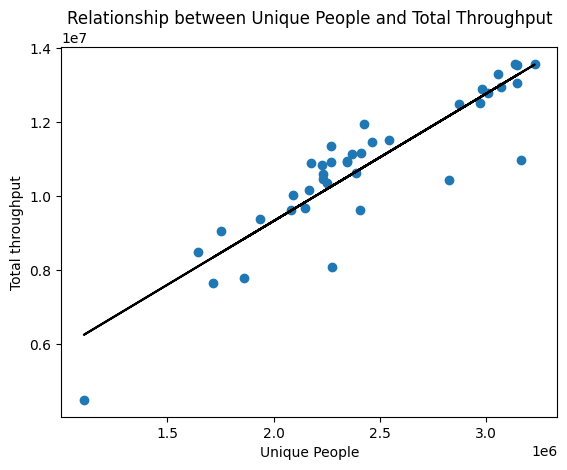

In [166]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.title("Relationship between Unique People and Total Throughput")
plt.xlabel("Unique People")
plt.ylabel("Total throughput")
# plt.xlim(0)
# plt.ylim(0)

# View the plot.
plt.show()